# AA273: HW4
Ramon Iglesias

## Q1

**1.1)** 

**Predict**:
\begin{align}
\Sigma_{t + 1| t} & = A_{t} \Sigma_{t | t} A_{t}^T + Q_{t} \\
\Sigma_{t + 1| t}^{-1} & = (A_{t} \Sigma_{t | t} A_{t}^T + Q_{t})^{-1} \\
& = Q_{t}^{-1} - Q_{t}^{-1} A_{t} (A_t^T Q_{t}^{-1} A_t + \Sigma_{t|t}^{-1})^{-1} A_t^T Q_{t}^{-1} \\
\Omega_{t + 1|t}& = Q_{t}^{-1} - Q_{t}^{-1} A_{t} (A_t^T Q_{t}^{-1} A_t + \Omega{t|t})^{-1} A_t^T Q_{t}^{-1} \\
\end{align}

**Update**:
\begin{align}
\Sigma_{t | t} & = \Sigma_{t | t -1} - \Sigma_{t | t -1} C_t^T (C_t \Sigma_{t | t -1} C_t^T + R_t) ^ {-1} C_t \Sigma_{t | t -1} \\
\Sigma_{t | t} & = (\Sigma_{t | t -1}^{-1} + C_t^T R_{t}^{-1} C_t ) ^{-1}\\
\Sigma_{t | t}^-1 & = \Sigma_{t | t -1}^{-1} + C_t^T R_{t}^{-1} C_t \\
\Omega_{t | t} & = \Omega_{t | t -1} + C_t^T R_{t}^{-1} C_t \\
\end{align}

**1.2)**

**Predict**:
\begin{align}
\mu_{t + 1 | t} &=  A_t \mu_{t | t} + B_t u_t \\
\Sigma_{t+1 | t} \xi_{t + 1 | t} &=  A_t \mu_{t | t} + B_t u_t \\
\xi_{t + 1 | t} &= \Sigma_{t+1 | t}^{-1}  (A_t \Sigma_{t | t} \xi_{t | t}  + B_t u_t \\
&= \Omega_{t+1 | t}  (A_t \Omega_{t | t}^{-1} \xi_{t | t}  + B_t u_t )\\
\end{align}

**Update**:
\begin{align}
\mu_{t | t} & = \Sigma_{t | t -1} - \Sigma_{t | t -1} C_t^T (C_t \Sigma_{t | t -1} C_t^T + R_t) ^ {-1} (y_t - C_t\mu_{t | t-1} - D_t u_t) \\
\Omega_{t | t}^{-1} \xi_{t | t} & = \Omega_{t | t -1}^{-1} \xi_{t | t-1}  - \Omega_{t | t -1}^{-1}  C_t^T (C_t \Omega_{t | t -1}^{-1} C_t^T + R_t) ^ {-1} (y_t - C_t\mu_{t | t-1} - D_t u_t) \\
& = \Omega_{t | t -1}^{-1} \xi_{t | t -1} - K_t C_t \Omega_{t | t -1}^{-1} + K_t z_t
\end{align}

where
$$
K_t = \Omega_{t | t -1}^{-1}  C_t^T (C_t \Omega_{t | t -1}^{-1} C_t^T + R_t) ^ {-1}\, , \\
z_t = y_t - D_t u_t
$$

Looking at the first two terms:
\begin{align}
\Omega_{t | t -1}^{-1} \xi_{t | t -1} - K_t C_t \Omega_{t | t -1}^{-1} &= \Omega_{t | t -1}^{-1} \xi_{t | t-1} -\Omega_{t | t -1}^{-1}  C_t^T (C_t \Omega_{t | t -1}^{-1} C_t^T + R_t) ^ {-1} C_t \Omega_{t | t -1}^{-1} \xi_{t | t-1} \\
&= (\Omega_{t | t -1}^{-1} -\Omega_{t | t -1}^{-1}  C_t^T (C_t \Omega_{t | t -1}^{-1} C_t^T + R_t) ^ {-1} C_t \Omega_{t | t -1}^{-1})\xi_{t | t-1} \\
&= (\Omega_{t | t -1} + C_t^T R_t^{-1} C_t)^{-1} \xi_{t | t-1} \\
&= \Omega_{t | t}^{-1} \xi_{t | t-1} \\
\end{align}

For the third term we have:
\begin{align}
K_t z_t &= \Omega_{t | t -1}^{-1}  C_t^T (C_t \Omega_{t | t -1}^{-1} C_t^T + R_t) ^ {-1} z_t \\
&= (\Omega_{t | t -1} + C_t R_t^{-1} C_t) ^ {-1} C^T R^{-1} z_t \\
&= \Omega_{t | t} ^{-1} C^T R_t ^{-1} z_t
\end{align}

Thus:
\begin{align}
\Omega_{t | t}^{-1} \xi_{t | t} & = \Omega_{t | t}^{-1} \xi_{t | t-1} + \Omega_{t | t} ^{-1} C^T R_t ^{-1} z_t \\
\xi_{t | t} &= \xi_{t | t-1} + C^T R_t ^{-1} (y_t - D_t u_t)
\end{align}

**1.3)** As seen from these equations, prediction steps are costlier in the information filter compared to the Kalman filter, and but update steps are cheaper (gauged from the number of matrix inversions). Thus, depending on which step gets called more often or is more critical, you can choose between each of these filters.

## Q2

**1.1)**

$$
w_{x,t+1} = \frac{J_y - J_z}{J_x} w_{y,t} w_{z,t} \delta t + \frac{\tau_x}{J_x} \delta t + w_{x,t}
$$

$$
w_{y,t+1} = \frac{J_z - J_x}{J_y} w_{z,t} w_{x,t} \delta t + \frac{\tau_y}{J_y} \delta t + w_{y,t}
$$

$$
w_{z,t+1} = \frac{J_x - J_y}{J_z} w_{x,t} w_{y,t} \delta t + \frac{\tau_z}{J_z} \delta t + w_{z,t}
$$

where $\delta t = 0.001$s

**1.2)**

Let $\mu_{t} = [\mu_{x,t} \mu_{y,t} \mu_{z,t}]$ be the mean of the angular velocity vector. Then the Jacobian is:

$$
G_t = g'(u_t, \mu_{t-1}) = \begin{bmatrix}
\frac{\partial \mu_{x,t-1}}{\mu_{x,t-1}} & \frac{\partial \mu_{x,t-1}}{\mu_{y,t-1}}  & \frac{\partial \mu_{x,t-1}}{\mu_{z,t-1}} \\
\frac{\partial \mu_{y,t-1}}{\mu_{x,t-1}} & \frac{\partial \mu_{y,t-1}}{\mu_{y,t-1}}  & \frac{\partial \mu_{y,t-1}}{\mu_{z,t-1}} \\
\frac{\partial \mu_{z,t-1}}{\mu_{x,t-1}} & \frac{\partial \mu_{z,t-1}}{\mu_{y,t-1}}  & \frac{\partial \mu_{z,t-1}}{\mu_{z,t-1}} 
\end{bmatrix} \\
= \begin{bmatrix}
1 & \frac{J_y - J_z}{J_x} \mu_{z,t} \delta t   & \frac{J_y - J_z}{J_x} \mu_{y,t} \delta t  \\
\frac{J_z - J_x}{J_y}\mu_{z,t} \delta t  & 1  & \frac{J_z - J_x}{J_y}\mu_{x,t} \delta t \\
\frac{J_x - J_y}{J_z}\mu_{y,t} \delta t & \frac{J_x - J_y}{J_z}\mu_{x,t} \delta t  & 1 
\end{bmatrix}
$$

**1.3)** 

Let 
$$
s(x) = \begin{cases}
1 \quad \text{if } |x| < c\\
0 \quad \text{otherwise}
\end{cases}
$$

Then the Jacobian of the saturation is

$$
H_t = h'(\hat{\mu}_t) = \begin{bmatrix}
s(\hat{\mu}_{x,t}) & 0 & 0 \\
0 & s(\hat{\mu}_{y,t})  & 0\\
0 & 0  & s(\hat{\mu}_{z,t})
\end{bmatrix}
$$

## Q3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse
% matplotlib inline

In [40]:
def gen_noise(size, cov):
    mean = np.zeros(size)
    return multivariate_normal.rvs(mean = mean, cov = cov)

class LTVSystem:
    def __init__(self, g, h, g_jac, h_jac, Q, R, x_0, control_func, t_0, dt):
        self.g = g
        self.g_jac = g_jac
        self.h = h
        self.h_jac = h_jac
        self.Q = Q
        self.R = R
        self.x = x_0
        self.control_func = control_func
        self.t = t_0
        self.dt = dt
        return
    
    def forward_step(self):
        w = gen_noise(self.Q.shape[1], self.Q)
        u = self.control_func(self.x, self.t)
        self.x = self.g(self.x, u) + w
        self.t += self.dt
        y = self.get_measurement(u)
        return u, y
    
    def get_measurement(self, u):
        y = self.h(self.x, u)
        v = gen_noise(y.shape[0], self.R)
        return y + v

In [45]:
class ExtendedKalmanFilter:
    def __init__(self, ltv_system, mu_0, sigma_0):
        self.g = ltv_system.g
        self.h = ltv_system.h
        self.g_jac = ltv_system.g_jac
        self.h_jac = ltv_system.h_jac
        self.Q = ltv_system.Q
        self.R = ltv_system.R
        self.mu = mu_0
        self.sigma = sigma_0
        return
    
    def predict(self, u):
        self.mu =  self.g(self.mu, u)
        G = self.g_jac(mu, u)
        self.sigma = np.dot(G, np.dot(self.sigma,G.T)) + self.Q
        return self.mu, self.sigma
    
    def update(self, y,u):
        H = self.h_jac(self.mu, u)
        K = np.dot(
            np.dot(self.sigma, H.T),
            np.linalg.inv(
                np.dot(np.dot(H, self.sigma), H.T) + self.Q
            )
        )
        self.mu = self.mu + np.dot(K, y - self.h(self.mu,u))
        self.sigma = np.dot(
            np.eye(self.sigma.shape[0]) - np.dot(K, H),
            self.sigma
        )
        return self.mu, self.sigma

In [102]:
gen_noise(3, R)

array([ 0.17350371,  0.22320272, -0.04192088])

In [122]:
J = np.array([1., 5., 5.])

c = 10.


dt = 0.001


def discrete_time_motion(x, u):
    new_x = np.zeros(x.shape)
    new_x[0] = ((J[1] - J[2]) * x[1] * x[2] + u[0]) * (dt / J[0]) + x[0]
    new_x[1] = ((J[2] - J[0]) * x[2] * x[0] + u[1]) * (dt / J[1]) + x[1]
    new_x[2] = ((J[0] - J[1]) * x[0] * x[1] + u[2]) * (dt / J[2]) + x[2]
    return new_x

def measurement_func(x, u):
    return np.clip(x, -c, c)

def motion_jacobian(mu,u):
    j_vec = np.array([
        (J[1] - J[2]) / J[0],
        (J[2] - J[0]) / J[1],
        (J[0] - J[1]) / J[2]
    ]) * dt
    G = np.array([
        [1, mu[2], mu[1]],
        [mu[2], 1, mu[0]],
        [mu[1], mu[0], 1]
    ])
    G[range(G.shape[0]),range(G.shape[0])] = 1
    return np.matmul(np.diag(j_vec), G)

def measurement_jacobian(x, u):
    mask = np.abs(x) < c
    y = np.zeros(x.shape[0])
    y[mask] = 1
    return np.diag(y)

Q = np.eye(3) * 0.004

R = np.eye(3) * 0.1

mu_0 = np.array([10., 0., 0.])

x_0 = mu_0

sigma_0 = np.eye(3)

t_0 = 0.

def control_func(x, t):
    return np.zeros(x.shape)

sat_system = LTVSystem(discrete_time_motion, measurement_func, 
                       motion_jacobian, measurement_jacobian,
                       Q, R, mu_0, control_func, t_0, dt)
ekf = ExtendedKalmanFilter(sat_system, mu_0, sigma_0)

In [124]:
nsteps = 100

measurements = np.zeros((nsteps, mu_0.shape[0]))
real_trajectory = np.zeros((nsteps, x_0.shape[0]))
mus = np.zeros((nsteps+1, x_0.shape[0]))
sigmas = np.zeros((nsteps+1, x_0.shape[0], x_0.shape[0]))
mus[0, :] = mu_0
sigmas[0, :, :] = sigma_0
for i in range(nsteps):
    u, y = sat_system.forward_step()
    measurements[i,:] = y
    real_trajectory[i,:] = sat_system.x
    mu, sigma = ekf.update(y, u)
    mu, sigma = ekf.predict(u)
    mus[i+1, :] = mu
    sigmas[i+1, :, :] = sigma

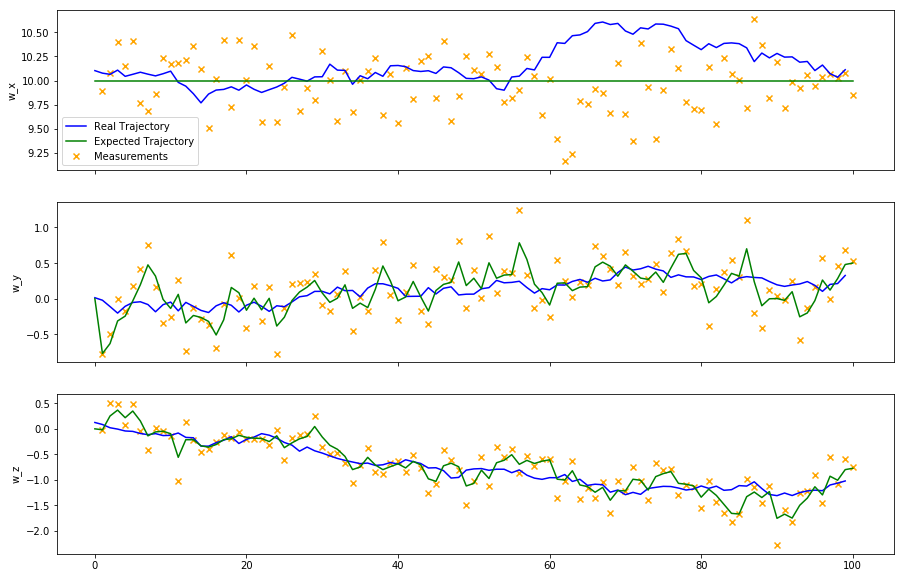

In [143]:

f, axarr = plt.subplots(3,1, sharex = True, figsize = (15,10))
names = ['w_x', 'w_y', 'w_z']
for i, ax in enumerate(axarr):
    ax.plot(real_trajectory[:,i], label = 'Real Trajectory', color = 'blue')
    ax.scatter(range(1,nsteps+1), measurements[:,i], 
               label = 'Measurements', marker='x', 
               color='orange')
    ax.plot(mus[:,i], label = 'Expected Trajectory', color = 'green')
    ax.set_ylabel(names[i])
axarr[0].legend()